In [18]:
#importamos librerias
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [19]:
pwd

'C:\\Users\\axelt\\Documents\\UVG4\\InteligenciaArtificial\\RegresionLinealPrueba'

In [20]:
#Creamos una variable para leer el archivo CSV
blinky = pd.read_csv("Admission_Predict.csv")
blinky.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


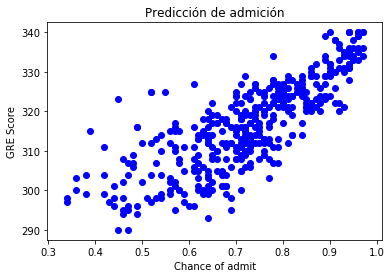

In [21]:
#Asignamos a la variable x los datos de GRE Score
#Asigne gre score ya que es la prueba que se realiza en USA para conocer los conocimientos de los graduados y es
#necesaria para optar a un postgrado 
X =  blinky.GRE_Score
y = blinky.iloc[:, 8].values
XM = np.array([y])
#Asignamos a la variable y los datos de Chance of Admit              
ym = np.array([X]) 
plt.scatter(XM, ym, color = 'blue')
plt.title('Predicción de admición')
plt.xlabel('Chance of admit')
plt.ylabel('GRE Score')
plt.show()

In [22]:
TRAINING_ELEMENTS = 200
x = np.linspace(
    -10,
    30,
    TRAINING_ELEMENTS
)

X = np.vstack(
    (
        np.ones(TRAINING_ELEMENTS),
        x,
        # x ** 2,
        x ** 3,
    )
).T

# y = x ** 3 + 50 - 100 * np.random.rand(TRAINING_ELEMENTS)
y = 5 + 2 * x ** 3 + np.random.randint(-15, 15, TRAINING_ELEMENTS)
dataset_1 = (X, y.reshape(TRAINING_ELEMENTS, 1))

In [23]:
#Se define diferentes cosas que nos ayudaran con nuestro resultado final 
#Se define el decenso al gradiente 
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.01,
        treshold=0.0001,
        max_iter=10000):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta)
        i += 1
        costs.append(cost(X, y, theta))
        gradient_norms.append(cost_derivate(X, y, theta))
    return theta, costs, gradient_norms

In [24]:
#Creamos la definicion para calcular el costo linear 
def linear_cost(X, y, theta):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    return sq.sum() / (2 * m)

In [25]:
def linear_cost_derivate(X, y, theta):
    h = np.matmul(X, theta)
    m, _ = X.shape
    return np.matmul((h - y).T, X).T / m

In [26]:
#Se entrenan los datos
(X, y) = dataset_1
m, n = X.shape

In [27]:
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000000001,
    treshold=0.001,
    max_iter=10000
)
print ('THETA:', theta)

THETA: [[0.7555397 ]
 [0.92790355]
 [1.99881482]]


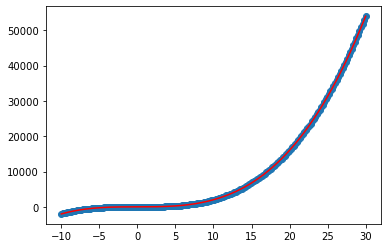

In [28]:
# Plot training data
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
# plt.plot(np.arange(len(costs)), costs)
plt.show()

In [29]:
#Separamos los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(XM.reshape(-1,1), ym.reshape(-1,1), test_size=0.2)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 1)

In [31]:
# Tomamos las caracteristicas existentes a caracteristicas de mayor grado 
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

In [38]:
#Definir modelo de regresion linear 
from sklearn import datasets, linear_model
pr = linear_model.LinearRegression()

In [40]:
#Entrenar datos
pr.fit(X_train_poli, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#Se realiza la prediccion
Y_pred_pr = pr.predict(X_test_poli)

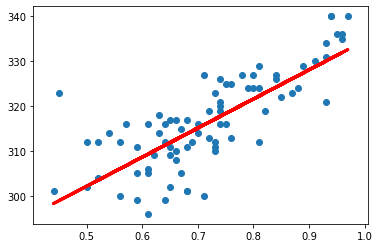

In [42]:
#Graficamos los datos junto con el modelo\n",
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)
plt.show()

In [ ]:
#El modelo que hice me parece bueno ya que la regresion lineal que obtuve logra tocar varios puntos, 
#aparte tiene una forma buena 